In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('nifty50.csv')
df.head()

,Symbol,Open,High,Low,Last Traded Price,Change,%Change,Traded Volume(lacs),Traded Value(crs),52 Week High,52 Week Low,365 Days % Change,30 Days % Change,Yrows,Xcols
0,IBULHSGFIN,447,521,447,510,65.65,14.77,374.75,"1,829.16","1,380.90",425.5,-62.78,-25.77,1,1
1,EICHERMOT,"16,730.15","17,787.95","16,730.15","17,600.00",788.35,4.69,1.83,317.1,"29,800.00","15,786.00",-36.22,-7.56,1,2
2,TITAN,"1,050.00","1,077.00","1,041.50","1,077.00",35.90,3.45,29.45,311.55,"1,340.90",732.3,15.19,-2.00,1,3
3,MARUTI,"5,937.65","6,155.00","5,927.20","6,100.25",198.00,3.35,14.45,874.67,"9,468.30","5,446.05",-33.75,2.60,1,4
4,BAJAJFINSV,"7,355.00","7,590.00","7,325.00","7,494.00",203.55,2.79,4.16,311.27,"8,580.00","4,955.00",6.27,-4.60,1,5


In [3]:
df.drop(['Last Traded Price','Change','Low','Traded Volume(lacs)','Traded Value(crs)','52 Week High','52 Week Low','365 Days % Change','30 Days % Change'],axis=1,inplace=True)

In [4]:
df.head(2)

,Symbol,Open,High,%Change,Yrows,Xcols
0,IBULHSGFIN,447,521,14.77,1,1
1,EICHERMOT,"16,730.15","17,787.95",4.69,1,2


In [5]:
df.rename(columns={'%Change':'Change'},inplace=True)

In [6]:
df.head(2)

,Symbol,Open,High,Change,Yrows,Xcols
0,IBULHSGFIN,447,521,14.77,1,1
1,EICHERMOT,"16,730.15","17,787.95",4.69,1,2


In [7]:
symbol=(np.asarray(df['Symbol'])).reshape(5,10)
perchange=(np.asarray(df['Change'])).reshape(5,10)
open=(np.asarray(df['Open'])).reshape(5,10)
high=(np.asarray(df['High'])).reshape(5,10)

print(symbol)
print(perchange)
print(open)
print(high)

[['IBULHSGFIN' 'EICHERMOT' 'TITAN' 'MARUTI' 'BAJAJFINSV' 'HDFCBANK'
  'BAJFINANCE' 'VEDL' 'HINDUNILVR' 'KOTAKBANK']
 ['ICICIBANK' 'GAIL' 'HDFC' 'HEROMOTOCO' 'M&M' 'INFRATEL' 'GRASIM'
  'BRITANNIA' 'BPCL' 'RELIANCE']
 ['ULTRACEMCO' 'ASIANPAINT' 'ADANIPORTS' 'LT' 'IOC' 'INFY' 'INDUSINDBK'
  'AXISBANK' 'ONGC' 'UPL']
 ['BAJAJ-AUTO' 'DRREDDY' 'BHARTIARTL' 'HCLTECH' 'TCS' 'POWERGRID' 'WIPRO'
  'SBIN' 'SUNPHARMA' 'JSWSTEEL']
 ['NTPC' 'TATAMOTORS' 'ITC' 'ZEEL' 'TATASTEEL' 'COALINDIA' 'HINDALCO'
  'TECHM' 'CIPLA' 'YESBANK']]
[[14.77  4.69  3.45  3.35  2.79  2.32  2.16  2.02  1.94  1.93]
 [ 1.68  1.6   1.45  1.25  1.03  0.98  0.98  0.94  0.82  0.75]
 [ 0.64  0.64  0.55  0.29  0.19  0.16  0.07  0.   -0.11 -0.12]
 [-0.13 -0.23 -0.3  -0.47 -0.58 -0.64 -0.79 -0.85 -0.93 -0.99]
 [-1.04 -1.21 -1.34 -1.51 -1.62 -2.15 -2.24 -2.53 -3.57 -7.85]]
[['447' '16,730.15' '1,050.00' '5,937.65' '7,355.00' '2,247.00'
  '3,359.95' '139' '1,805.00' '1,506.00']
 ['416.5' '122.2' '2,192.70' '2,613.85' '540.9' '250.25'

In [8]:
result=df.pivot(index='Yrows',columns='Xcols',values='Change')
result

Xcols,1,2,3,4,5
Yrows,,,,,
1,14.77,4.69,3.45,3.35,2.79
2,2.32,2.16,2.02,1.94,1.93
3,1.68,1.60,1.45,1.25,1.03
4,0.98,0.98,0.94,0.82,0.75
5,0.64,0.64,0.55,0.29,0.19
6,0.16,0.07,0.00,-0.11,-0.12
7,-0.13,-0.23,-0.30,-0.47,-0.58
8,-0.64,-0.79,-0.85,-0.93,-0.99
9,-1.04,-1.21,-1.34,-1.51,-1.62


In [9]:
# create an array to annotate the heatmap
labels=(np.asarray(["{0} \n {1} \n {2} \n {3} ".format(symb,value,OP,HI) for symb,value,OP,HI in zip(symbol.flatten(),perchange.flatten(),open.flatten(),high.flatten())])).reshape(10,5)
labels

array([['IBULHSGFIN \n 14.77 \n 447 \n 521 ',
        'EICHERMOT \n 4.69 \n 16,730.15 \n 17,787.95 ',
        'TITAN \n 3.45 \n 1,050.00 \n 1,077.00 ',
        'MARUTI \n 3.35 \n 5,937.65 \n 6,155.00 ',
        'BAJAJFINSV \n 2.79 \n 7,355.00 \n 7,590.00 '],
       ['HDFCBANK \n 2.32 \n 2,247.00 \n 2,289.00 ',
        'BAJFINANCE \n 2.16 \n 3,359.95 \n 3,449.60 ',
        'VEDL \n 2.02 \n 139 \n 144.8 ',
        'HINDUNILVR \n 1.94 \n 1,805.00 \n 1,846.65 ',
        'KOTAKBANK \n 1.93 \n 1,506.00 \n 1,535.50 '],
       ['ICICIBANK \n 1.68 \n 416.5 \n 422.4 ',
        'GAIL \n 1.6 \n 122.2 \n 125.4 ',
        'HDFC \n 1.45 \n 2,192.70 \n 2,240.00 ',
        'HEROMOTOCO \n 1.25 \n 2,613.85 \n 2,641.90 ',
        'M&M \n 1.03 \n 540.9 \n 548.3 '],
       ['INFRATEL \n 0.98 \n 250.25 \n 255 ',
        'GRASIM \n 0.98 \n 739 \n 767 ',
        'BRITANNIA \n 0.94 \n 2,590.90 \n 2,644.35 ',
        'BPCL \n 0.82 \n 343.5 \n 350.9 ',
        'RELIANCE \n 0.75 \n 1,161.85 \n 1,175.50 '],
       

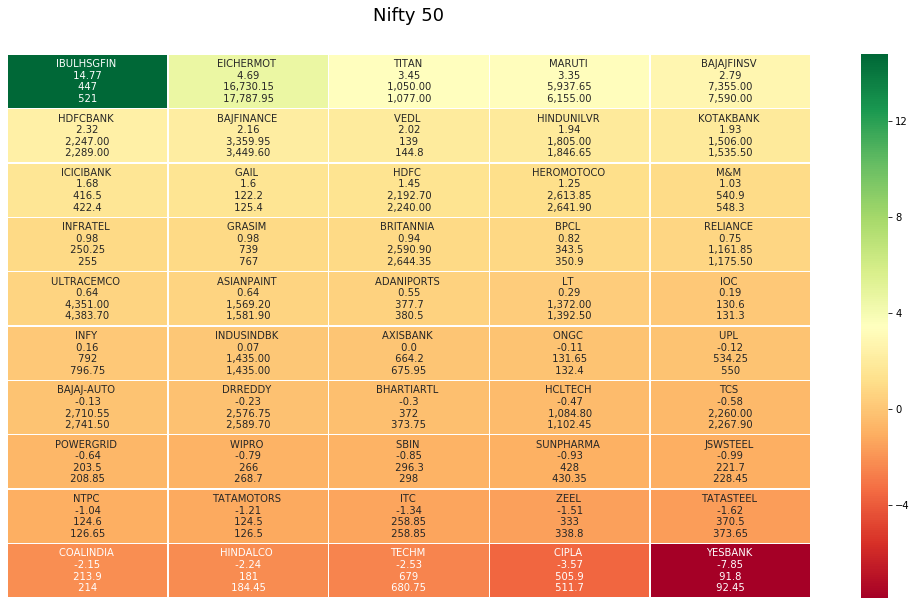

In [11]:
# Defining the plot
fig,ax=plt.subplots(figsize=(18,10))

# add title to the heat map
title ="Nifty 50"

# setthe font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])

# hide ticks for x and y axis
ax.set_xticks([])
ax.set_yticks([])

# remove the axes
ax.axis('off')

#use the heatmap function from  the seaborn package
sn.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# display the nifty 50
plt.show()

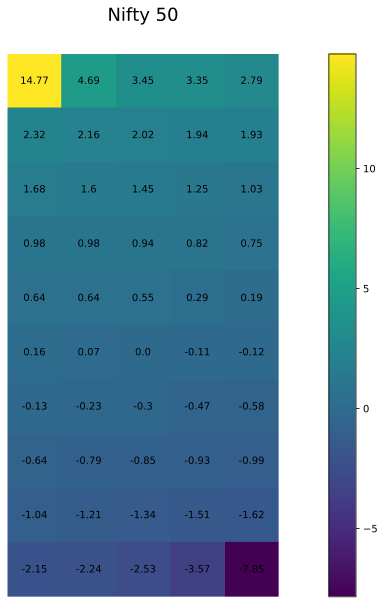

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

fig, ax = plt.subplots(figsize=(18,10))
title ="Nifty 50"
# setthe font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])
# hide ticks for x and y axis
ax.set_xticks([])
ax.set_yticks([])
# remove the axes
ax.axis('off')

im=ax.imshow(result)
fig.colorbar(im)
for (j,i), x in np.ndenumerate(result):
    url = "https://www.nseindia.com/products/content/equities/equities/archieve_eq.htm"
    ax.annotate(x, xy=(i,j), ha="center", va="center",
                url=url, bbox=dict(color='w', alpha=1e-6, url=url))
    
# display the nifty 50
plt.show()